# Collective Effects - Bipolar Isotropic Gas with Spectrum

In [7]:
#Importing Libraries
#from Initial_Conditions import *
#from scipy.integrate import odeint
from ODE_Functions import *
from Plots import *

import matplotlib.pyplot as plt
import time    
from IPython.display import HTML

In [8]:
nu_types=['nu_e','nu_x']
t_bins=1000
E_i,E_f=1,50
E_step=0.05

#Initial spectrum
E_0=[10,15,24,24] #Mean energy in MeV
Amplitude=[1,1,1,1]

In [9]:
mass_ord="NH"
start_time = time.time()
E_vec,t_vec,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH=solver_two_families(nu_types,t_bins,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 5.6042991002400715 minutes


In [10]:
mass_ord="IH"
start_time = time.time()
E_vec,t_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH=solver_two_families(nu_types,t_bins,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 6.350143035252889 minutes


In [11]:
# Save final Spectra
#NH
np.save("Output/Final_Spectrum_configuration_1_nu_e_NH.npy",nu_e_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_e_NH.npy",nubar_e_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nu_x_NH.npy",nu_x_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_x_NH.npy",nubar_x_time_NH[-1])
#IH
np.save("Output/Final_Spectrum_configuration_1_nu_e_IH.npy",nu_e_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_e_IH.npy",nubar_e_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nu_x_IH.npy",nu_x_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_x_IH.npy",nubar_x_time_IH[-1])

# Plots

In [12]:
def Plot(E_vec,nu_e,nubar_e, nu_x,nubar_x,title):
    fig= plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
    
    ax1=fig.add_subplot(1,2,1)
    #nu_e
    ax1.plot(E_vec, nu_e[-1],color='b',label=r'$\nu_e$')
    ax1.plot(E_vec, nu_e[0],color='b', linestyle="--",label=r'$\nu_e(t=0)$')#Initial
    #nu_x
    ax1.plot(E_vec,nu_x[-1],color='g',label=r'$\nu_x$')
    ax1.plot(E_vec, nu_x[0],color='g', linestyle="--",label=r'$\nu_x(t=0)$')#Initial
    #Text
    ax1.set_title("Neutrinos")
    ax1.set_xlabel(r'$E [MeV]$')
    ax1.set_ylabel(r'$\phi(E) [MeV^{-1}]$')
    ax1.legend(loc='upper right')
    
    ax2=fig.add_subplot(1,2,2)
    #nubar_e
    ax2.plot(E_vec,nubar_e[-1],color='r',label=r'$\overline{\nu}_e$')
    ax2.plot(E_vec, nubar_e[0],color='r', linestyle="--",label=r'$\overline{\nu}_e(t=0)$')#Initial
    #nubar_x
    ax2.plot(E_vec,nubar_x[-1],color='orange',label=r'$\overline{\nu}_x$')
    ax2.plot(E_vec, nubar_x[0],color='orange', linestyle="--",label=r'$\nu_x(t=0)$')#Initial
    #Text
    ax2.set_title("Antineutrinos")
    ax2.set_xlabel(r'$E [MeV]$')
    ax2.set_ylabel(r'$\phi(E) [MeV^{-1}]$')
    ax2.legend(loc='upper right')
    
    fig.suptitle((r'Isotropic Neutrino Gas - Mass Hierarchy: %s'%(title))+"\n"+
                 (r"$\overline{E}_{\nu_e}= %.1f$ MeV, $\overline{E}_{\overline{\nu}_e}= %.1f$ MeV, $\overline{E}_{\nu_x}= %.1f$ MeV"%(E_0[0],E_0[1],E_0[2])))
    fig.savefig("Figures/Isotrpic_Gas_Spectrum_%s.png"%title)

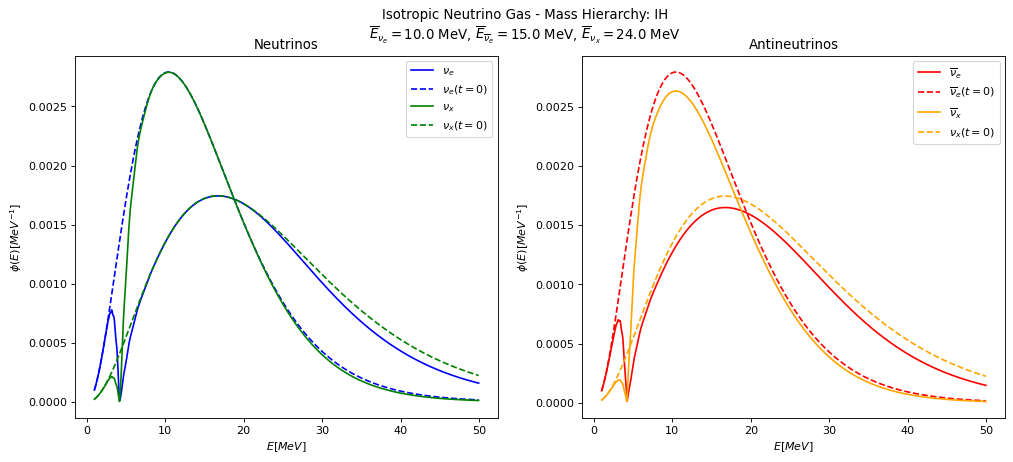

In [13]:
Plot(E_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")

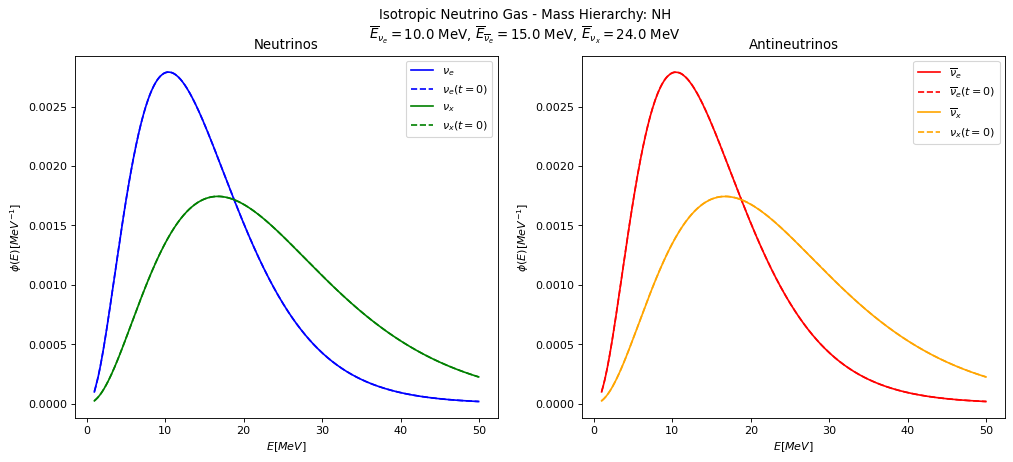

In [14]:
Plot(E_vec,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,"NH")

# Animations

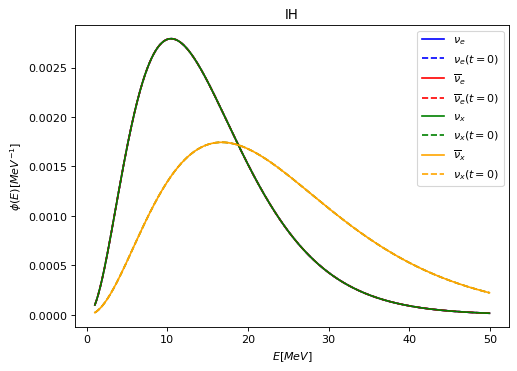

In [15]:
anim_IH=animation_2_families_spectrum(E_vec,t_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")

In [16]:
HTML(anim_IH.to_html5_video())